# Testing latest commits
## JCH 16/11/2017





## Importing libraries

In [35]:
#!/bin/env python
from __future__ import division
import sys
import healpy as hp
import numpy as np
import matplotlib.pyplot as mp
from qubic import *
from pysimulators import FitsArray
import time
import os
%matplotlib inline
rc('figure',figsize=(15,10))
rc('font',size=20)

## Choosing TD or not

In [36]:
### NB: Some of the pathes here are on my computer. You will have to change them
TD = True
path = QubicCalibration().path
if(TD):
	print('Technological Demonstrator')
	os.system('\cp '+path+'/TD_CalQubic_HornArray_v4.fits '+path+'/CalQubic_HornArray_v5.fits')
	os.system('\cp '+path+'/TD_CalQubic_DetArray_v3.fits '+path+'/CalQubic_DetArray_v4.fits')
else:
	print('First Instrument')
	os.system('rm -f '+path+'/CalQubic_HornArray_v5.fits')
	os.system('rm -f '+path+'/CalQubic_DetArray_v4.fits')

Technological Demonstrator


## Monochromatic Instrument

In [37]:
nside = 256
scene = QubicScene(nside)
from qubic import QubicInstrument
instTD = QubicInstrument(filter_nu=150e9)

### Visualizing Horns and Detectors

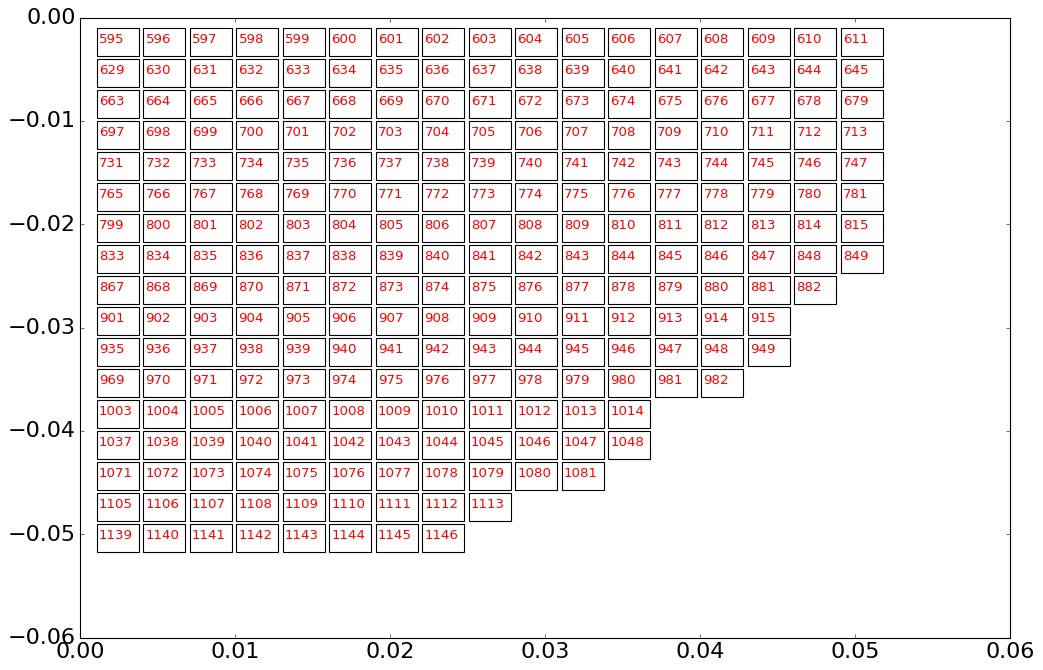

In [38]:
xx,yy,zz = instTD.detector.center.T
index_det = instTD.detector.index
for i in xrange(len(instTD.detector)):
	text(xx[i]-0.0012,yy[i],'{}'.format(index_det[i]), fontsize=12, color='r')
instTD.detector.plot()


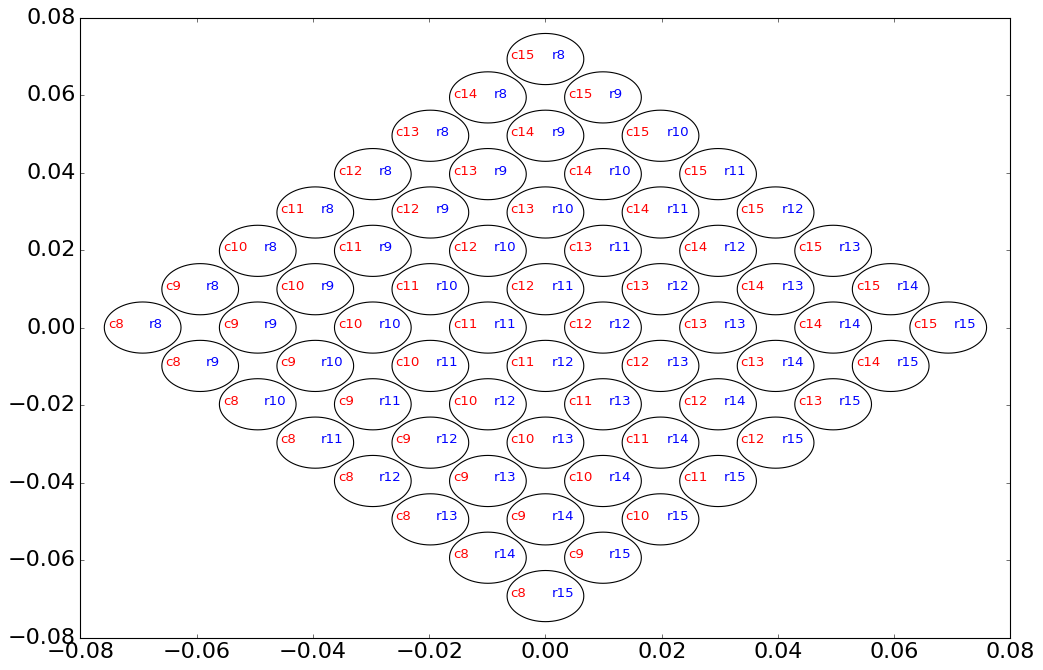

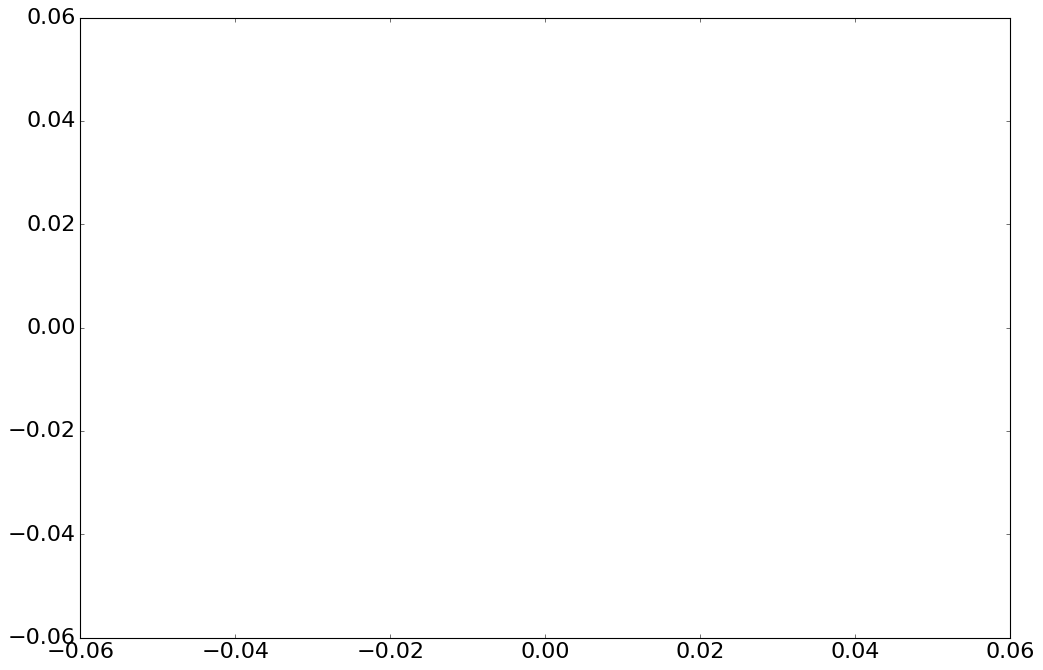

In [39]:
centers = instTD.horn.center[:,0:2]
col = instTD.horn.column
row = instTD.horn.row
for i in xrange(len(centers)):
    text(centers[i,0]-0.006, centers[i,1], 'c{0:}'.format(col[i]), color='r',fontsize=12)
    text(centers[i,0]+0.001, centers[i,1], 'r{0:}'.format(row[i]), color='b',fontsize=12)
instTD.horn.plot()

### Synthesized Beam

#### No Pixel Integration

/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


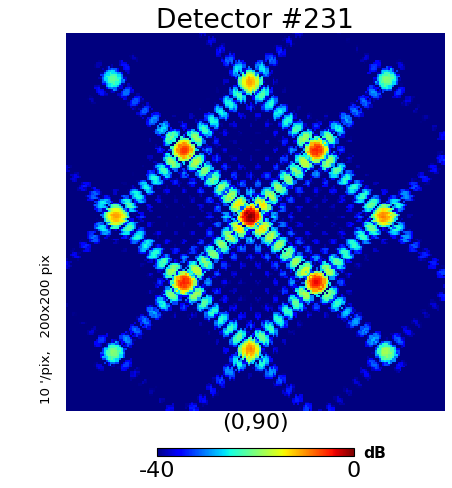

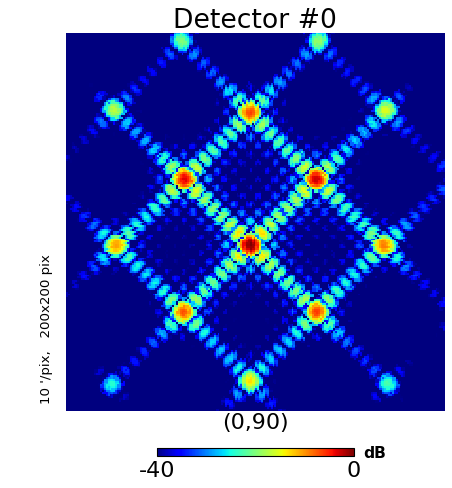

In [42]:
idet = 231
sb = instTD.get_synthbeam(scene, idet)
hp.gnomview(10*np.log10(sb/np.max(sb)), rot=[0,90], 
	reso=10, min=-40, max=0, unit='dB', title='Detector #{}'.format(idet))

idet = 0
sb = instTD.get_synthbeam(scene, idet)
hp.gnomview(10*np.log10(sb/np.max(sb)), rot=[0,90], 
	reso=10, min=-40, max=0, unit='dB', title='Detector #{}'.format(idet))

#### With Pixel Integration

(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)


/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


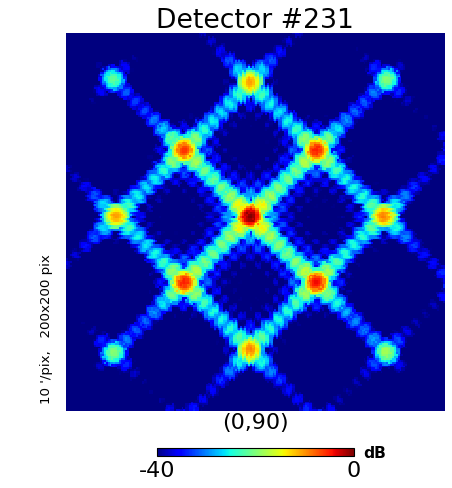

In [43]:
idet = 231
sb = instTD.get_synthbeam(scene, idet, detector_integrate=5)
hp.gnomview(10*np.log10(sb/np.max(sb)), rot=[0,90], 
	reso=10, min=-40, max=0, unit='dB', title='Detector #{}'.format(idet))

#### With External (Maynooth) Electric Field on Focal Plane simulation

In [44]:
import glob
rep = '/Users/hamilton/Qubic/SynthBeam/NewSimsMaynooth/QUBIC Basic/'
files = glob.glob(rep+'*.dat')

nn = 161
xmin = -60./1000
xmax = 60./1000
ymin = -60./1000
ymax = 60./1000
xx = np.linspace(-60,60,nn)/1000
yy = np.linspace(-60,60,nn)/1000
nbhorns = len(instTD.horn)
allampX = np.zeros((nbhorns,nn,nn))
allphiX = np.zeros((nbhorns,nn,nn))
allampY = np.zeros((nbhorns,nn,nn))
allphiY = np.zeros((nbhorns,nn,nn))
#### Read the files
for i in xrange(nbhorns):
    print(i)
    data = np.loadtxt(rep+'x{0:02d}y{1:02d}.dat'.format(instTD.horn.row[i]-1, instTD.horn.column[i]-1), skiprows=4)
    allampX[i,:,:] = np.reshape(data[:,0],(nn,nn))
    allphiX[i,:,:] = np.reshape(data[:,1],(nn,nn))
    allampY[i,:,:] = np.reshape(data[:,2],(nn,nn))
    allphiY[i,:,:] = np.reshape(data[:,3],(nn,nn))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


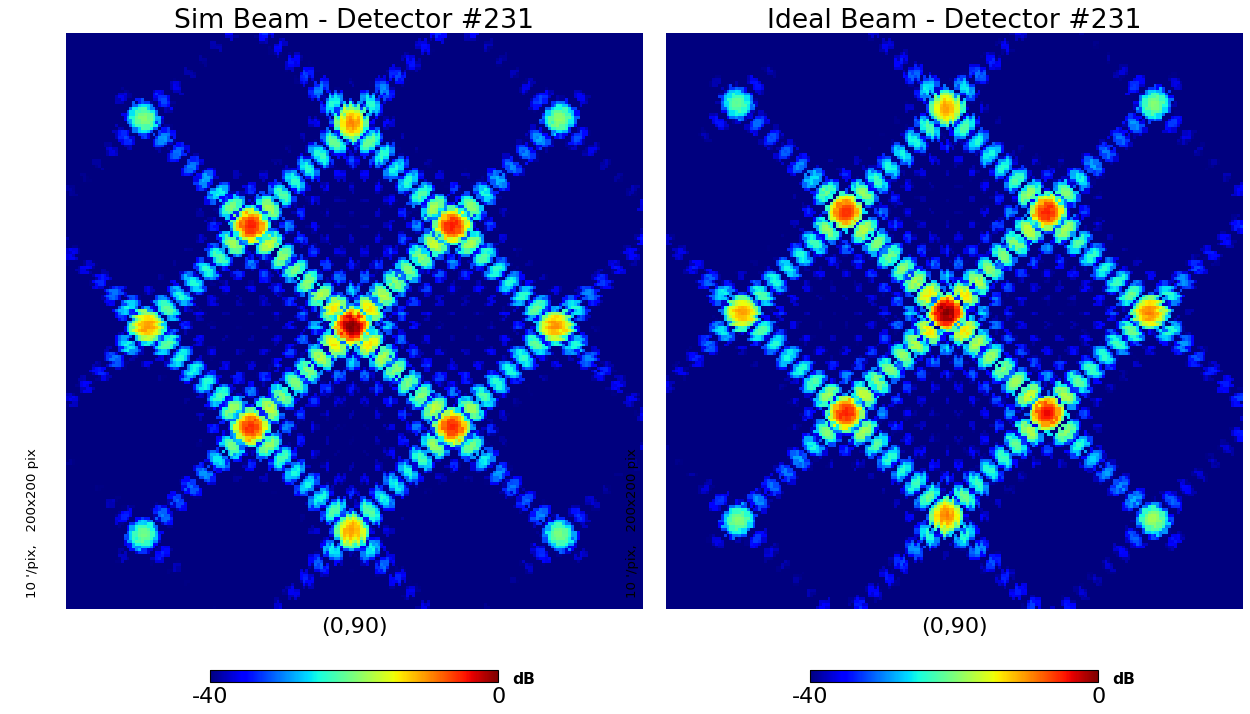

In [45]:
#### Electric field
Ax = allampX * (cos(allphiX) + 1j*sin(allphiX))
Ay = allampY * (cos(allphiY) + 1j*sin(allphiY))
external_A = [xx, yy, allampX, allphiX]

idet = 231
sb = instTD.get_synthbeam(scene, idet, external_A=external_A)
sbideal = instTD.get_synthbeam(scene, idet)

figure()
hp.gnomview(10*np.log10(sb/np.max(sb)), rot=[0,90], 
	reso=10, min=-40, max=0, unit='dB', title='Sim Beam - Detector #{}'.format(idet), sub=(1,2,1))
hp.gnomview(10*np.log10(sbideal/np.max(sbideal)), rot=[0,90], 
	reso=10, min=-40, max=0, unit='dB', title='Ideal Beam - Detector #{}'.format(idet), sub=(1,2,2))

## Wide-Band Instrument
Now instTD is a list of instruments at each frequency. Each one has a replication of the horns and detectors

This is not very optimal and could be improved in the future

In [46]:
nside = 256
scene = QubicScene(nside)

from qubic import QubicMultibandInstrument
Nf=10
band = 150.
relative_bandwidth = 0.25
Nbfreq_in, nus_edge_in, nus_in, deltas_in, Delta_in, Nbbands_in = compute_freq(band, relative_bandwidth, Nf)
instTD = QubicMultibandInstrument(filter_nus=nus_in * 1e9, filter_relative_bandwidths=nus_in / deltas_in) 

### Visualizing the Horns and detectors

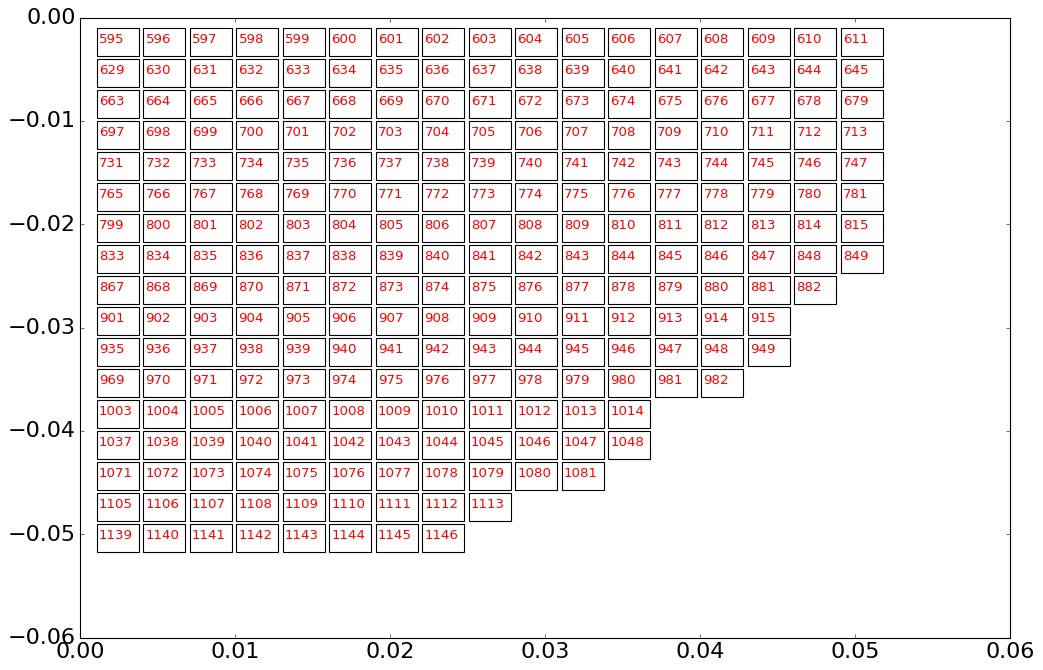

In [47]:
xx,yy,zz = instTD[0].detector.center.T
index_det = instTD[0].detector.index
for i in xrange(len(instTD[0].detector)):
	text(xx[i]-0.0012,yy[i],'{}'.format(index_det[i]), fontsize=12, color='r')
instTD[0].detector.plot()

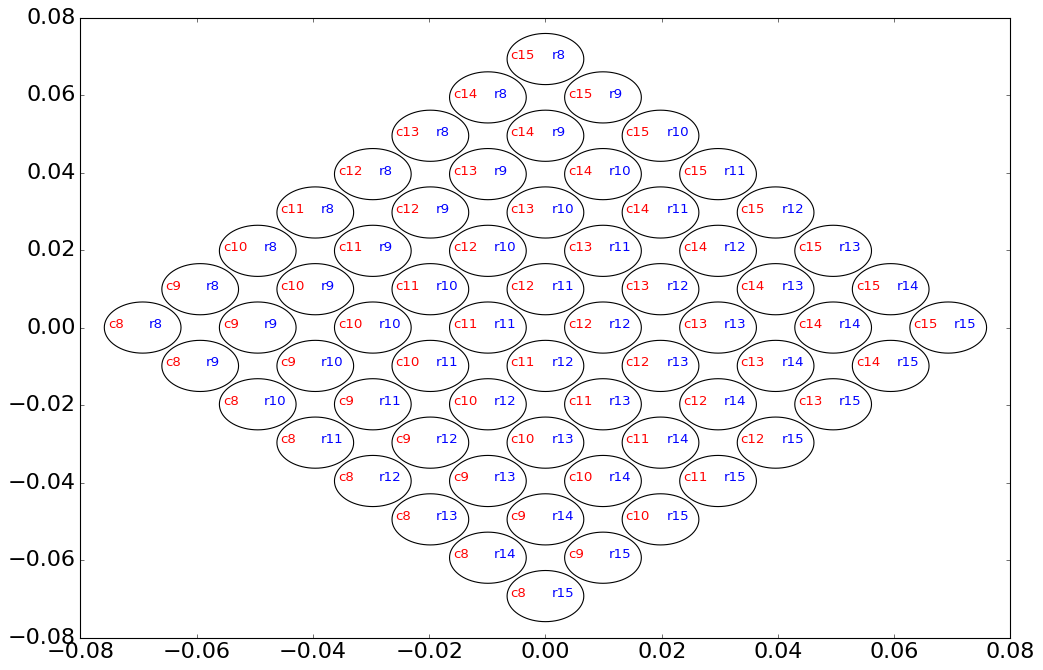

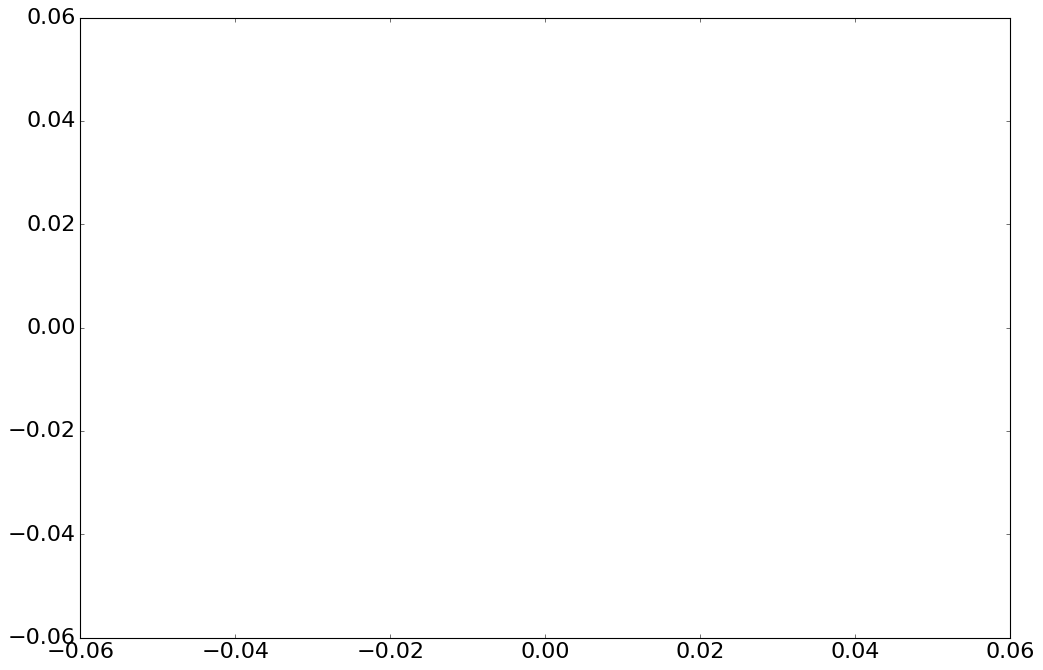

In [48]:
centers = instTD[0].horn.center[:,0:2]
col = instTD[0].horn.column
row = instTD[0].horn.row
for i in xrange(len(centers)):
    text(centers[i,0]-0.006, centers[i,1], 'c{0:}'.format(col[i]), color='r',fontsize=12)
    text(centers[i,0]+0.001, centers[i,1], 'r{0:}'.format(row[i]), color='b',fontsize=12)
instTD[0].horn.plot()

### Synthesized beam for wide-band instrument

/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


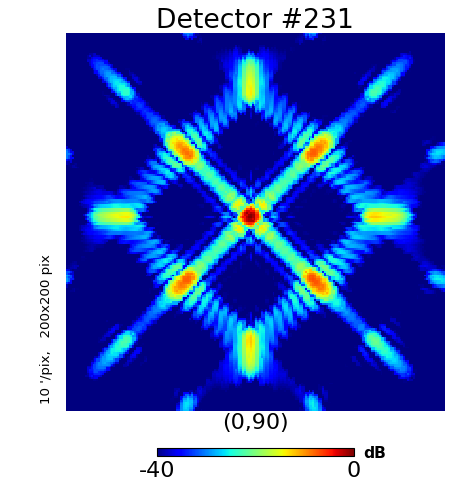

In [49]:
idet = 231
sb = instTD.get_synthbeam(scene, idet)
hp.gnomview(10*np.log10(sb/np.max(sb)), rot=[0,90], 
	reso=10, min=-40, max=0, unit='dB', title='Detector #{}'.format(idet))

### And also with Pixel Integration

(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)


/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


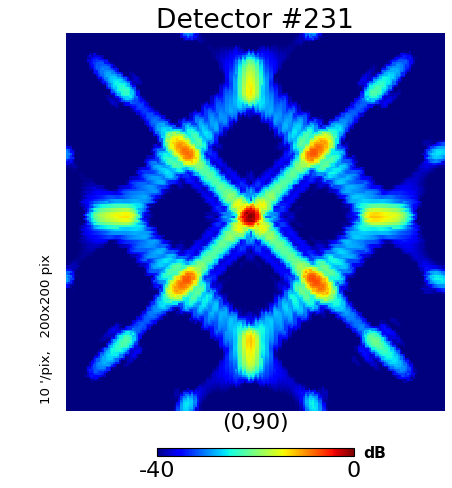

In [50]:
idet = 231
sb = instTD.get_synthbeam(scene, idet, detector_integrate=5)
hp.gnomview(10*np.log10(sb/np.max(sb)), rot=[0,90], 
	reso=10, min=-40, max=0, unit='dB', title='Detector #{}'.format(idet))